0     0.600944
1     0.676327
2     0.685743
3     0.739137
4     0.766541
5     0.824949
6     0.898301
7          inf
8          inf
9          inf
10         inf
11         inf
Name: K_down, dtype: float64
[  1.04309791   1.09960577   1.22813558   1.47135572   1.94250853
   3.021739     7.11306895 -23.10712519  -4.80483389  -2.91782708
  -2.28365104  -2.05270857]


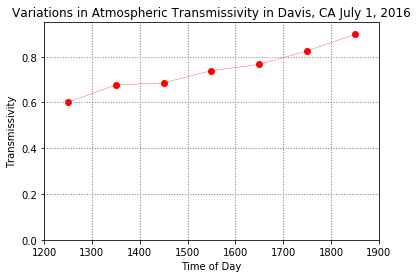

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from metpy.cbook import get_test_data
from metpy.units import units

#Read Values in from txt file, set constants 
col_names = ['Time','K_down', 'Diff','albedo','Tair','Tsurf','e_air', 'L_down','L_up','Q*' ]
df = pd.read_csv('table1.txt', names=col_names,skiprows=1, delim_whitespace=True) #Read in txtfile
df= df.astype(np.float64)
lat =38.5
n = 152  #DOY
Ele = 61 #evevation 61M 
Tair= df['Tair']
e_air = df['e_air']
K_down = df['K_down']
L_down = df['L_down']

#calc cosZIinitial= 1367 #solar constant
Iinitial= 1367 #solar constant
theta = ((2*np.pi*n)/365)  
theIinitial= 1367 #solar constant
distRatio = (1.00011 + .034221*np.cos(theta) + .001280*np.sin(theta) + 
            .000719*(2*(np.cos(theta-1))**2) + .000077*(2*(np.sin(theta)*np.cos(theta)))) #sun-earth distance eq
I = Iinitial*distRatio  #Extraterrestrial radiation normal to beam
time2 = [1250, 1350, 1450, 1550, 1650, 1750, 1850, 1950, 2050, 2150, 2250, 2350]
time= [12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5]
num15 = np.deg2rad(15)
houradj = np.subtract(12.0,time)
h =  np.multiply(num15,houradj)
decl= (np.deg2rad(23.5)* np.cos((2*np.pi*(n-172))/365)) #Angle of declination
cosZ = np.sin(np.deg2rad(lat))*np.sin(decl)+ np.cos(np.deg2rad(lat))*np.cos(decl)*np.cos(h) #Solar Zenith Angle 

Kex= cosZ*I #Total Radiation at top of atmo

m = 1.0/cosZ
m2 = m*(1-(.0285*(Ele/304.8)))

transmissivity = (K_down/Kex)**(1.0/m2)

#hours = (np.arange(1200,2400,100))
#plt.plot(hours, transmissivity)
plt.xlim(1200,1900)
plt.ylim(0,.95)
plt.xlabel("Time of Day")
plt.ylabel("Transmissivity")
plt.title("Variations in Atmospheric Transmissivity in Davis, CA July 1, 2016")
plt.grid(color='grey', linestyle=':', linewidth=1)


plt.plot(time2,transmissivity,linewidth = .3,color= 'red')
plt.scatter(time2,transmissivity, color= 'red')
print(transmissivity)
print(m2)

In [2]:
print(L_down)
Tair = (Tair + 273)
Ldown1 = np.multiply(.000000000000531,(Tair**6))
print(Ldown1)

sigma = .0000000567
ecc =2.718281
exp = (-e_air**(Tair/2016))
expn = (1-ecc**(exp))
tair1 =(Tair**4)
Ldown2 = (np.multiply(expn,tair1)) * 1.08 * sigma
print (Ldown2)



0     318.9
1     323.1
2     325.9
3     326.6
4     323.8
5     320.3
6     314.0
7     302.8
8     292.4
9     284.0
10    278.4
11    274.2
Name: L_down, dtype: float64
0     335.832227
1     339.632693
2     342.069780
3     342.698809
4     338.523425
5     330.842764
6     322.043938
7     305.347934
8     289.379571
9     277.146719
10    269.328725
11    264.219530
Name: Tair, dtype: float64
0     331.115482
1     334.782660
2     338.121983
3     338.460566
4     335.609091
5     331.947080
6     325.393747
7     313.310402
8     302.261676
9     293.167904
10    287.294346
11    282.876278
dtype: float64


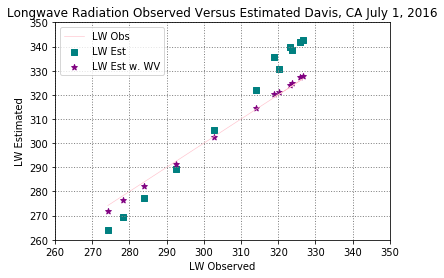

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(L_down, L_down, linewidth = .6, color= 'pink', label= 'LW Obs')
#plt.plot(L_down, Ldown1, linewidth = .1, color ='teal',label= 'LW Est')
#plt.plot(L_down,Ldown2, linewidth = .1, color = 'purple')
#plt.plot(L_down, L_down)
plt.scatter(L_down, Ldown1, color ='teal', marker="s",label= 'LW Est')
plt.scatter(L_down,Ldown2-10.8, color = 'purple', marker = '*',label= 'LW Est w. WV')
plt.xlabel("LW Observed")
plt.ylabel("LW Estimated")
plt.title("Longwave Radiation Observed Versus Estimated Davis, CA July 1, 2016")
plt.grid(color='grey', linestyle=':', linewidth=1)
plt.xlim(260,350)
plt.ylim(260,350)
plt.legend()